# 2.信用情報


Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。

[Home Credit Default Risk | Kaggle](https://www.kaggle.com/c/home-credit-default-risk)

Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

#### 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。

Home Creditはどのような企業？
このコンペティションでは何を予測する？
それを予測することで企業が得られるメリットは何？

##### データセットの準備
分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。

また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となっています。

Dataページ内の他のcsvファイルはこの課題では扱いません。


Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。

《推奨参考Notebooks》


[Home Credit Default Risk Extensive EDA | Kaggle](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)  
[HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle](https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772)  
[HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle](https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp)  



この他タイトルにEDAと付いているものを参考にしてください。

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

1　銀行口座がない人のための金貸し
2 ローン返済能力
3 リスク低減、顧客獲得


#### 【問題2】データの概観の把握
データの概観を把握するために以下のようなことを行ってください。

.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df = pd.read_csv('application_train.csv')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,...,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,...,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,...,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single /

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,...,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,...,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192

In [102]:
df_null = df.isnull().sum()
df_null[df_null>0].sort_values(ascending=False).head(10)

COMMONAREA_MEDI             214864
COMMONAREA_AVG              214864
COMMONAREA_MODE             214864
NONLIVINGAPARTMENTS_MEDI    213513
NONLIVINGAPARTMENTS_MODE    213513
NONLIVINGAPARTMENTS_AVG     213513
FONDKAPREMONT_MODE          210294
LIVINGAPARTMENTS_MODE       210198
LIVINGAPARTMENTS_MEDI       210198
LIVINGAPARTMENTS_AVG        210198
dtype: int64

<AxesSubplot:>

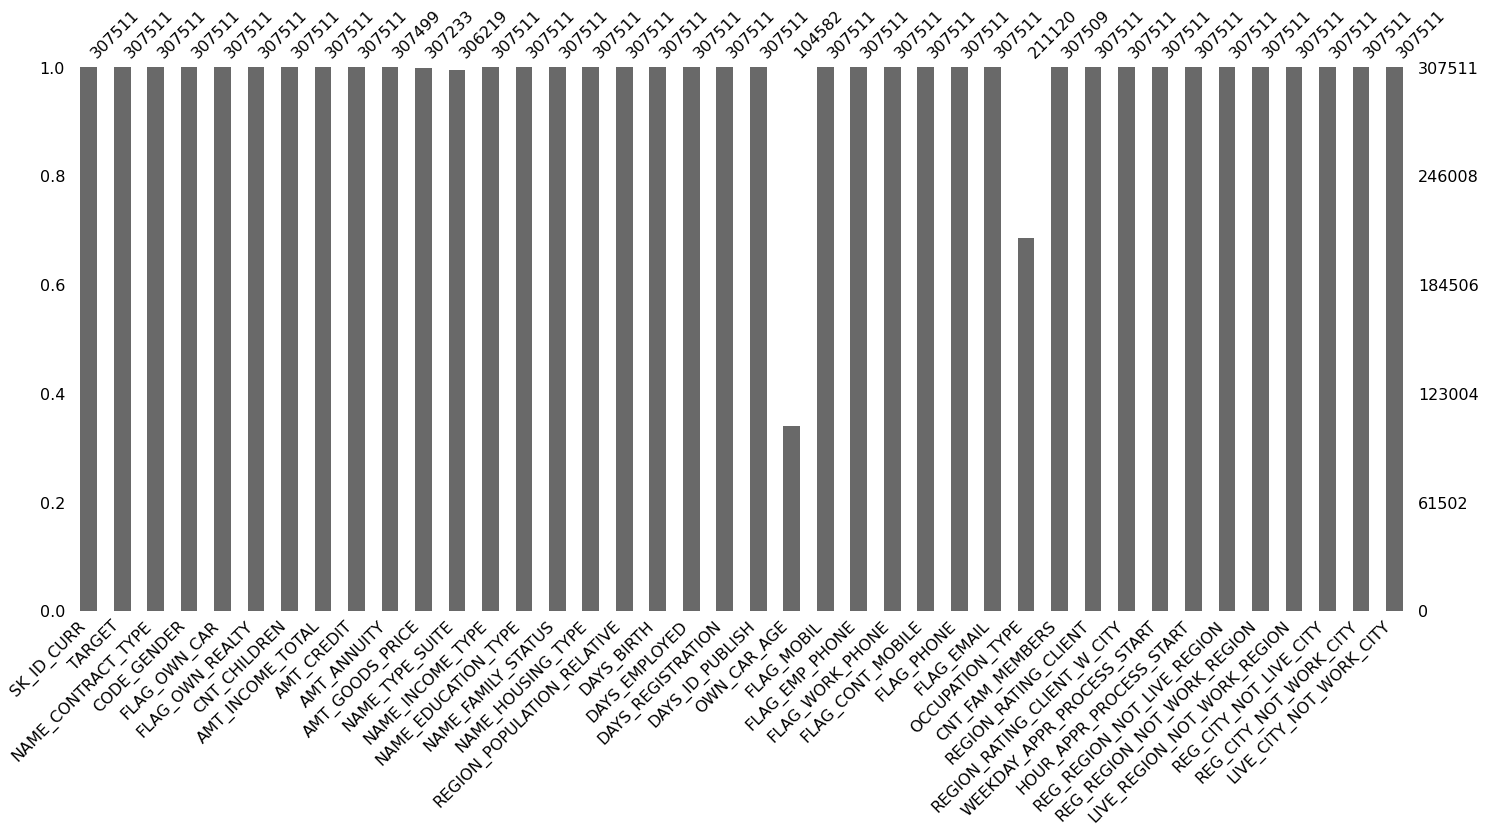

In [6]:
msno.bar(df.iloc[:,:40])

<AxesSubplot:>

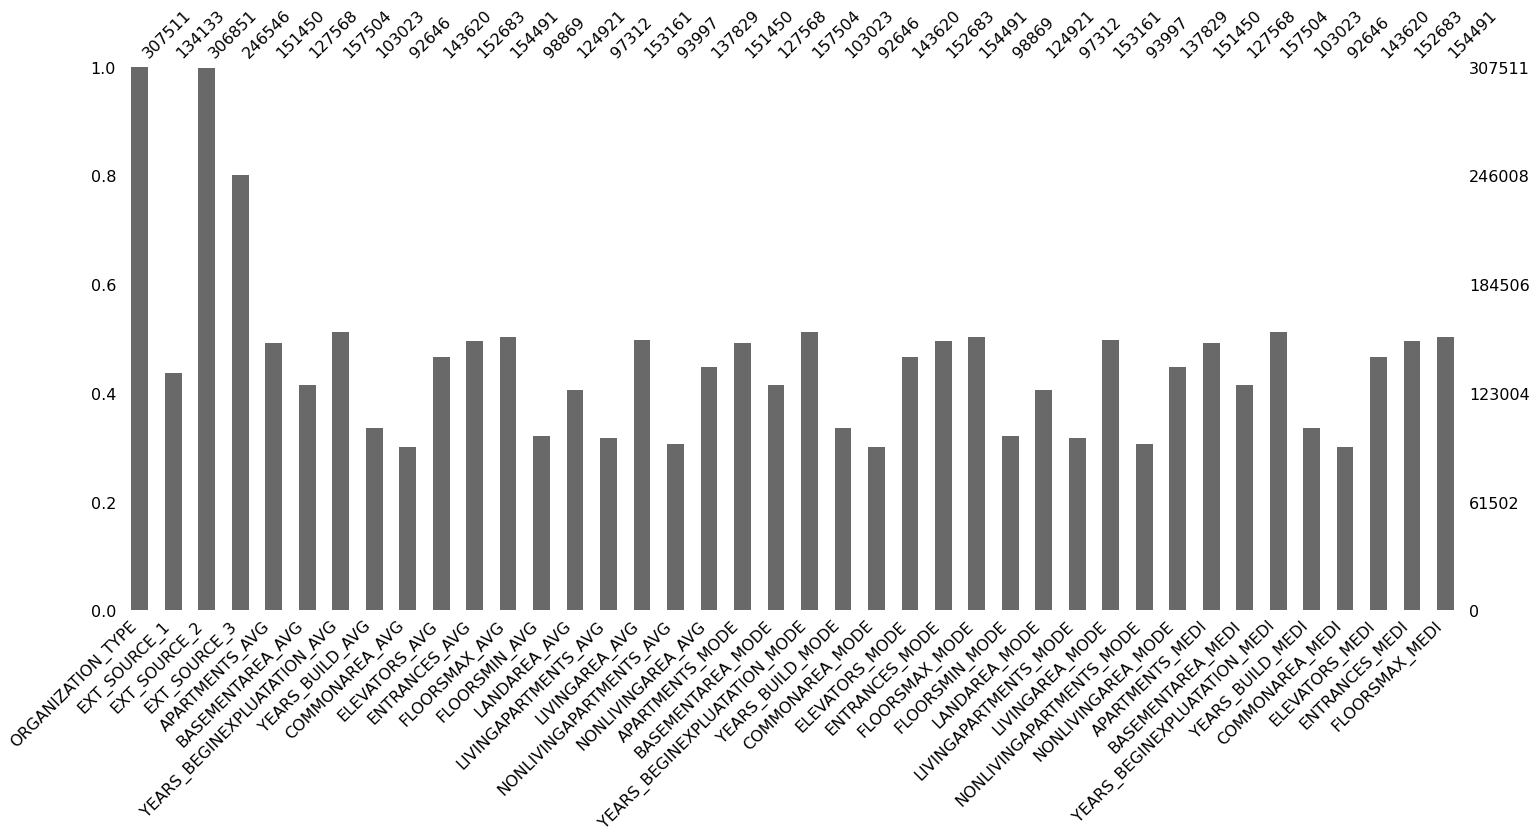

In [7]:
msno.bar(df.iloc[:,40:80])

<AxesSubplot:>

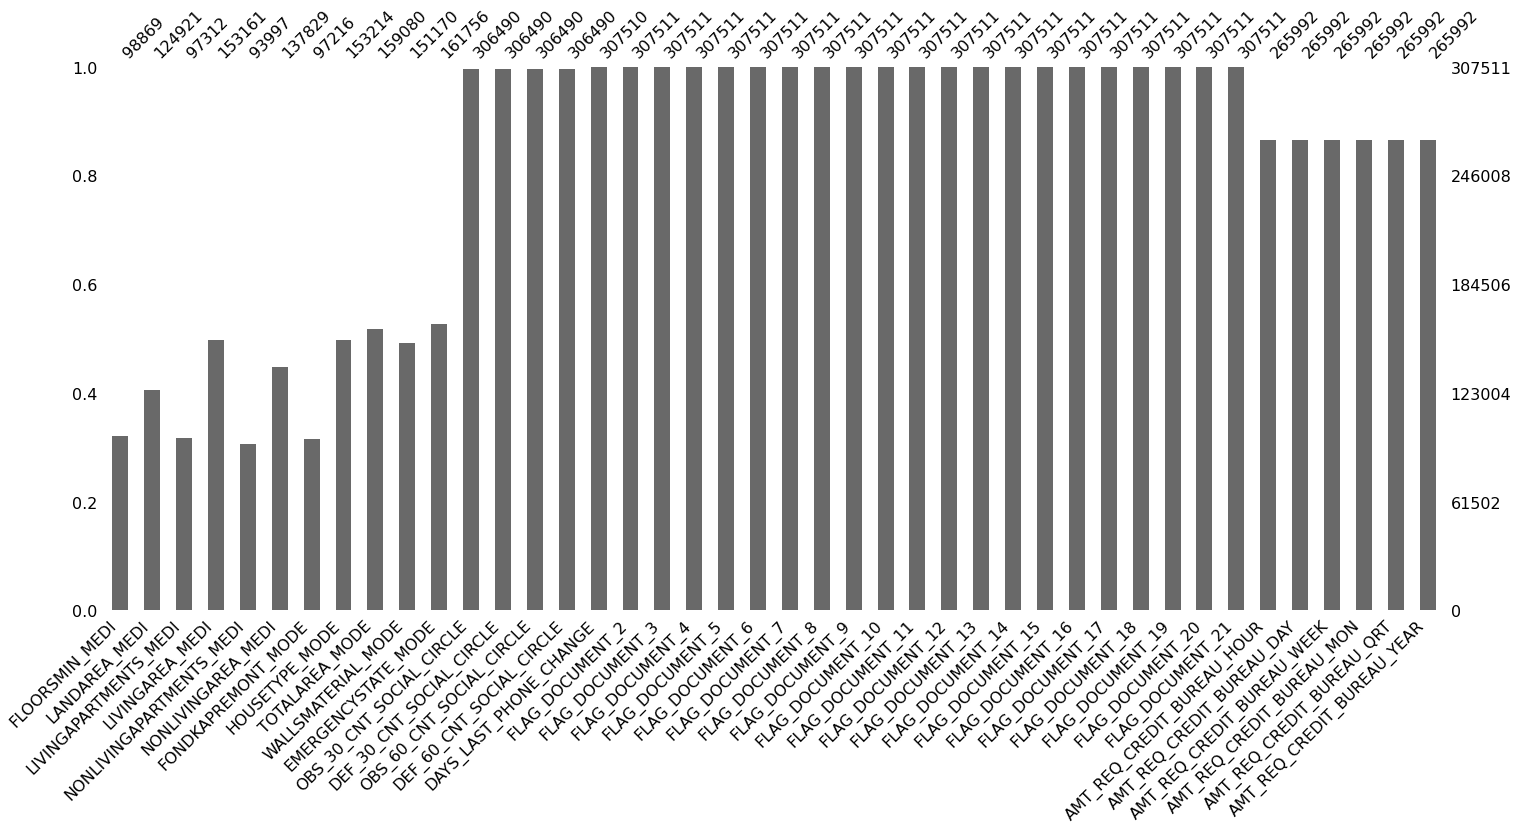

In [8]:
msno.bar(df.iloc[:,80:])

In [9]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

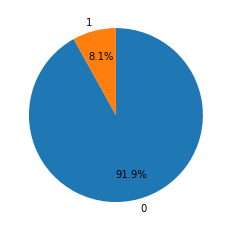

In [10]:
label = ['0','1']
 
plt.pie(df['TARGET'].value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

- 説明変数がものすごく多いことがわかる。
- 欠損値も視覚的にみたときにものすごくあることがわかる。
- 返済できている人の割合が多い

### 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

どんな人が返せなくなったのか、どんな人が返せたのか
- 収入に対しての借りた額  
- 性別 　
- ローンの種類  
- 収入源  
- 家族の状況
- 職業 　
- 車の所有の有無
- 学歴  
- 年齢 　
- など 　

### 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。

探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。


In [12]:
corr_df = df.corr()
corr_df

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,...,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,-0.002108,-0.001129,-0.001820,-0.000343,-0.000433,-0.000232,0.000849,-0.001500,0.001366,-0.000973,-0.000384,0.001818,0.002804,-0.001337,-0.000415,0.002815,0.002753,0.000281,-0.002895,-0.001075,-0.001138,0.000350,-0.000283,0.001097,0.002903,-0.001885,-0.001582,0.000067,0.000082,0.002342,0.000222,0.001556,-0.002070,0.001551,0.005900,-0.001463,0.004862,-0.002879,0.004851,0.003083,0.001465,0.003119,0.001770,-0.002575,0.003042,0.001961,-0.001411,0.001890,0.005245,...,0.003589,0.002156,-0.001923,0.001920,0.001988,-0.001647,0.001366,0.005777,-0.001036,0.005067,-0.002583,0.004588,0.002837,0.001699,0.003272,0.002205,-0.003020,0.002440,0.002288,-0.001409,-0.000082,-0.001423,0.001187,-0.000858,0.000700,-0.003411,-0.004139,-0.001097,0.002121,-0.002694,0.001809,0.001505,-0.000815,-0.002012,-0.001045,0.000896,-0.001077,0.002604,-0.000724,0.001450,0.000509,0.000167,0.001073,0.000282,-0.002672,-0.002193,0.002099,0.000485,0.001025,0.004659
TARGET,-0.002108,1.000000,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,0.078239,-0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,-0.023806,-0.001758,0.009308,0.058899,0.060893,-0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,-0.155317,-0.160472,-0.178919,-0.029498,-0.022746,-0.009728,-0.022149,-0.018550,-0.034199,-0.019172,-0.044003,-0.033614,-0.010885,-0.025031,-0.032997,-0.003176,-0.013578,-0.027284,-0.019952,-0.009036,-0.022068,...,-0.023393,-0.030685,-0.001557,-0.012711,-0.029184,-0.022081,-0.009993,-0.022326,-0.018573,-0.033863,-0.019025,-0.043768,-0.033394,-0.011256,-0.024621,-0.032739,-0.002757,-0.013337,-0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,-0.002672,-0.000316,-0.028602,-0.001520,-0.008040,-0.004352,-0.001414,-0.004229,-0.000756,-0.011583,-0.009464,-0.006536,-0.011615,-0.003378,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
CNT_CHILDREN,-0.001129,0.019187,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,0.330938,-0.239818,0.183395,-0.028019,0.008494,0.001041,0.240714,0.055630,-0.000794,-0.029906,0.022619,0.879161,0.025423,0.024781,-0.007292,-0.0

In [13]:
cor = df.corr()['TARGET'].abs().nlargest(13)
cor

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
Name: TARGET, dtype: float64

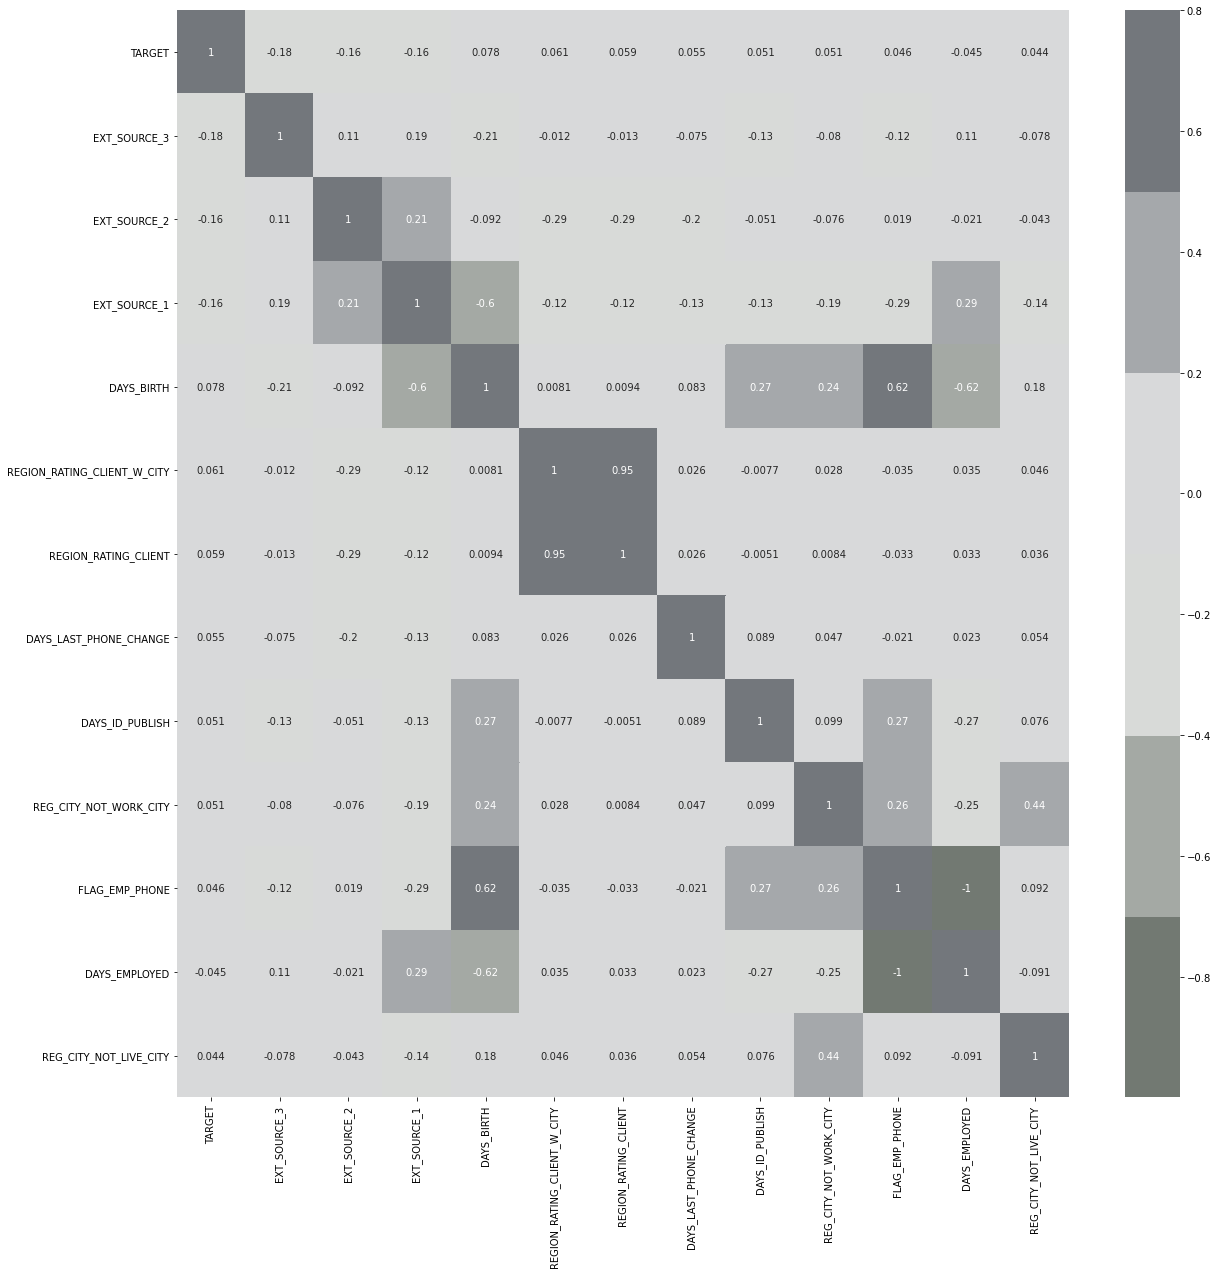

In [17]:
top_features = corr_df.index

plt.figure(figsize=(20,20))

pal = sns.diverging_palette(128, 240, 8)

sns.heatmap(df[cor.index].corr(), vmax=0.8, annot=True, cmap=pal)
plt.show()

 目的変数に対して相関が強い説明変数がない。
 上記にひかくてき
 相関係数が高いものを示した。

#### 借入と収入の関係

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

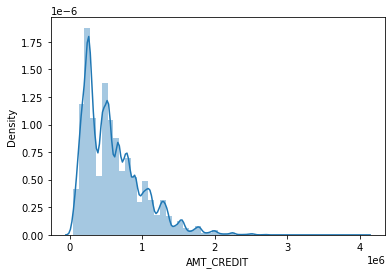

In [25]:
sns.distplot(df["AMT_CREDIT"])

<AxesSubplot:xlabel='AMT_GOODS_PRICE', ylabel='Density'>

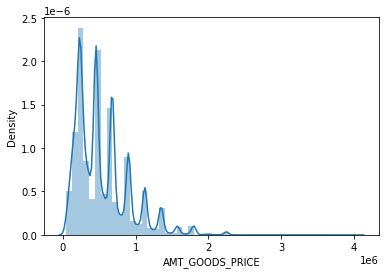

In [32]:
sns.distplot(df["AMT_GOODS_PRICE"])

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

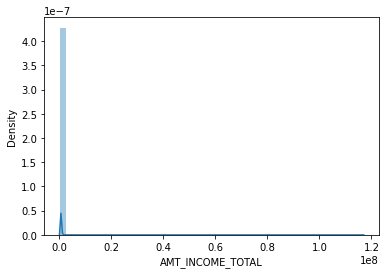

In [31]:
sns.distplot(df["AMT_INCOME_TOTAL"])

In [36]:
df["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(10)

12840     117000000.0
203693     18000090.0
246858     13500000.0
77768       9000000.0
131127      6750000.0
103006      4500000.0
204564      4500000.0
187833      4500000.0
287463      4500000.0
181698      3950059.5
Name: AMT_INCOME_TOTAL, dtype: float64

In [41]:
df.iloc[12840].head(20)

SK_ID_CURR                                           114967
TARGET                                                    1
NAME_CONTRACT_TYPE                               Cash loans
CODE_GENDER                                               F
FLAG_OWN_CAR                                              N
FLAG_OWN_REALTY                                           Y
CNT_CHILDREN                                              1
AMT_INCOME_TOTAL                           117000000.000000
AMT_CREDIT                                    562491.000000
AMT_ANNUITY                                    26194.500000
AMT_GOODS_PRICE                               454500.000000
NAME_TYPE_SUITE                               Unaccompanied
NAME_INCOME_TYPE                                    Working
NAME_EDUCATION_TYPE           Secondary / secondary special
NAME_FAMILY_STATUS                                  Married
NAME_HOUSING_TYPE                         House / apartment
REGION_POPULATION_RELATIVE              

ID：114967は収入に対して借入額が小さいのに返済できてないため外れ値として扱うこととした。

In [45]:
df = df.drop(df.index[12840])
df["AMT_INCOME_TOTAL"].sort_values(ascending=False).head(10)

203693    18000090.0
246858    13500000.0
77768      9000000.0
131127     6750000.0
103006     4500000.0
204564     4500000.0
287463     4500000.0
187833     4500000.0
181698     3950059.5
20216      3825000.0
Name: AMT_INCOME_TOTAL, dtype: float64

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

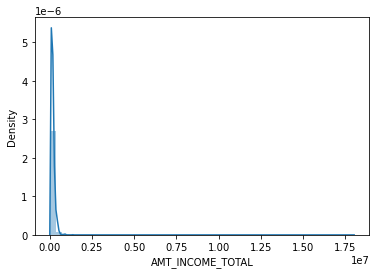

In [46]:
sns.distplot(df["AMT_INCOME_TOTAL"])

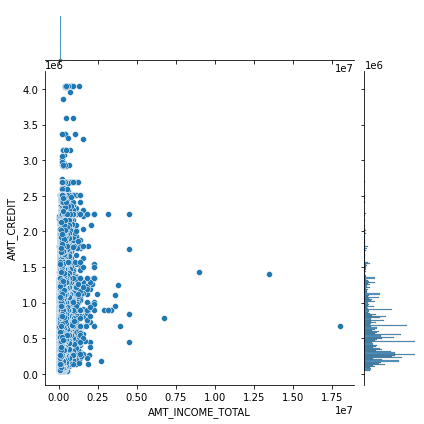

In [51]:
sns.jointplot(df["AMT_INCOME_TOTAL"],df["AMT_CREDIT"])

ほとんどの利用者が収入に対して何倍もの借入をしている。

#### ローンの種類

In [61]:
df["NAME_CONTRACT_TYPE"].head()

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: object

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

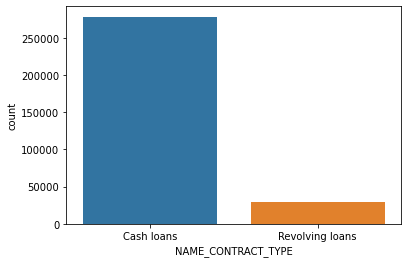

In [82]:
sns.countplot(df["NAME_CONTRACT_TYPE"])

<AxesSubplot:xlabel='TARGET'>

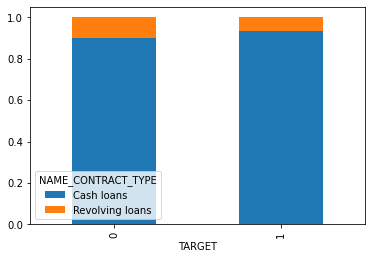

In [84]:
cash_revo = pd.crosstab(df['TARGET'], df['NAME_CONTRACT_TYPE'], normalize='index')
cash_revo.plot.bar(stacked=True)

多くの利用者がキャッシュローンを利用していることがわかる。 　

キャッシュも目的変数からみた割合は変わらない。 　

#### 男女別

<AxesSubplot:xlabel='TARGET'>

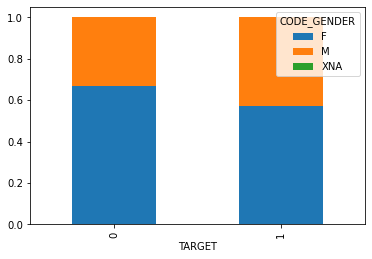

In [85]:
sex = pd.crosstab(df['TARGET'], df['CODE_GENDER'], normalize='index')
sex.plot.bar(stacked=True)

デフォルトしている人は女性比率が少し高い。

<AxesSubplot:xlabel='TARGET'>

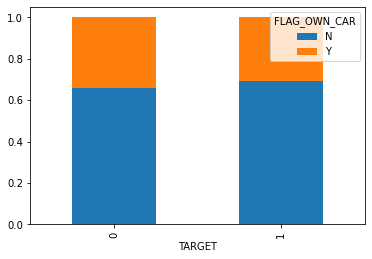

In [88]:
car = pd.crosstab(df['TARGET'], df['FLAG_OWN_CAR'], normalize='index')
car.plot.bar(stacked=True)

<AxesSubplot:xlabel='TARGET'>

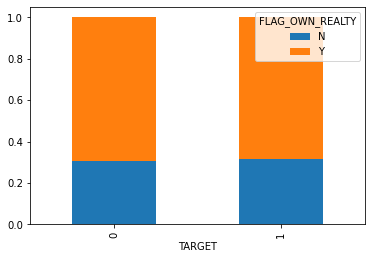

In [90]:
realty = pd.crosstab(df['TARGET'], df['FLAG_OWN_REALTY'], normalize='index')
realty.plot.bar(stacked=True)

車と家の割合は同じぐらいである。

#### 家族の構成

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

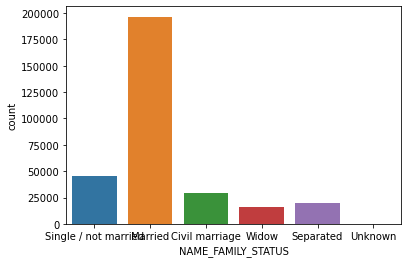

In [96]:
sns.countplot(df["NAME_FAMILY_STATUS"])

ほとんどの人が結婚していることがわかった。

<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

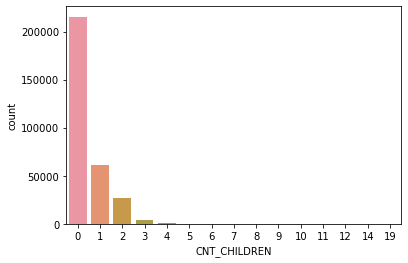

In [97]:
sns.countplot(df["CNT_CHILDREN"])

<AxesSubplot:xlabel='CNT_CHILDREN'>

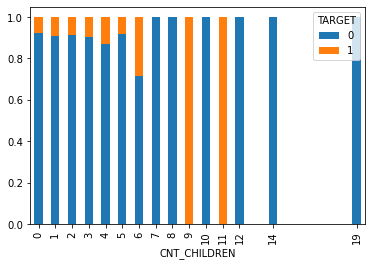

In [98]:
child = pd.crosstab(df['CNT_CHILDREN'], df['TARGET'], normalize='index')
child.plot.bar(stacked=True)

ほとんどの人は子供はいないことがわかる。 


子供が５人までは１割ぐらい返済できておらず、9人11人子供がいる人は返済できていない。

<AxesSubplot:xlabel='CNT_FAM_MEMBERS', ylabel='count'>

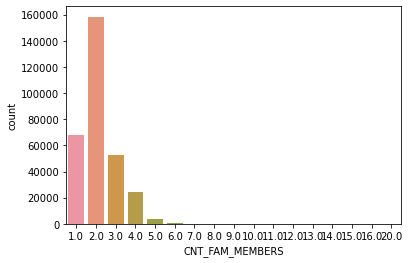

In [99]:
sns.countplot(df["CNT_FAM_MEMBERS"])

<AxesSubplot:xlabel='CNT_FAM_MEMBERS'>

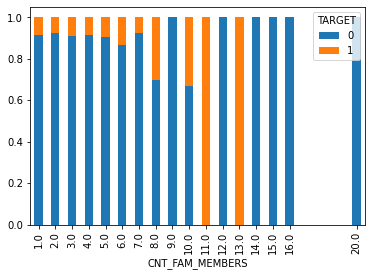

In [101]:
fam = pd.crosstab(df['CNT_FAM_MEMBERS'], df['TARGET'], normalize='index')
fam.plot.bar(stacked=True)

結婚してる人が多く、子供がいない人が多いので、当然二人家族が一番多くなるという妥当な値である。
次に独身、３人家族と続いている。

#### 収入源と職業

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

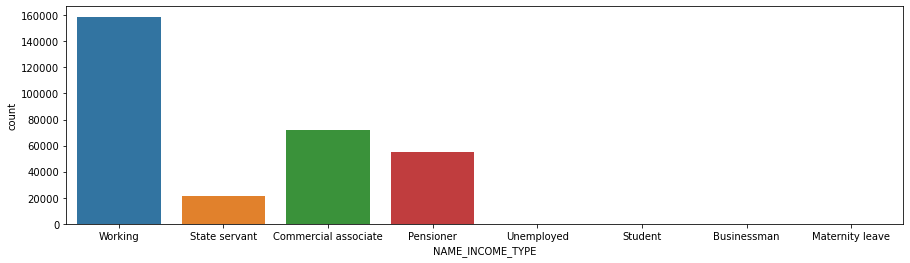

In [113]:
fig,ax = plt.subplots(figsize=(15,4))
sns.countplot(df["NAME_INCOME_TYPE"])

<AxesSubplot:xlabel='NAME_INCOME_TYPE'>

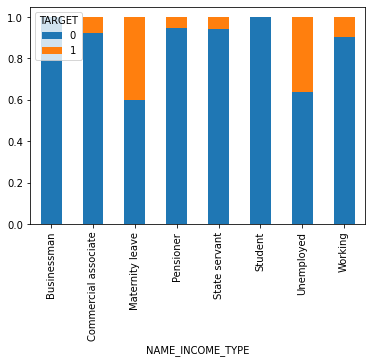

In [114]:
income_tp = pd.crosstab(df['NAME_INCOME_TYPE'], df['TARGET'], normalize='index')
income_tp.plot.bar(stacked=True)

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

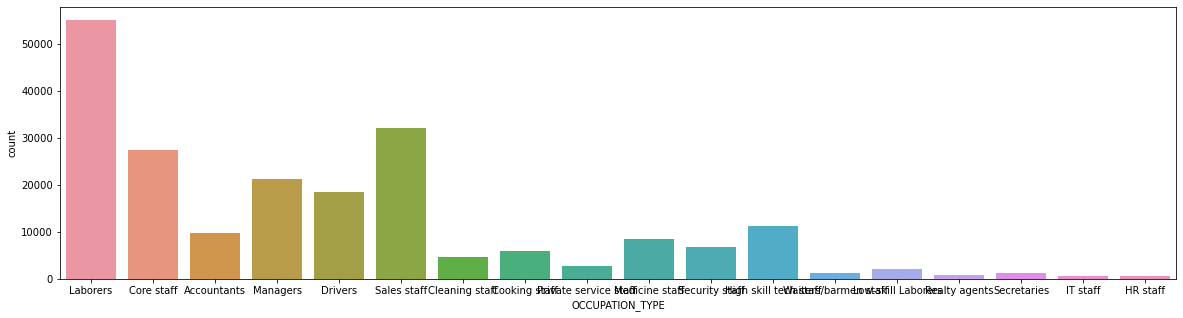

In [124]:
plt.figure(figsize=(20,5))
sns.countplot(df["OCCUPATION_TYPE"])

申請者のほとんどが労働者で次に商業借用である。 

割合図から育児休暇者と失業者が４割ものデフォルト者を出している。

ビジネスマンと学生は信用が高い結果となった。 　

職業的には労働者が一番多く、販売員が二番目となった

#### 年齢

<AxesSubplot:xlabel='DAYS_BIRTH', ylabel='Density'>

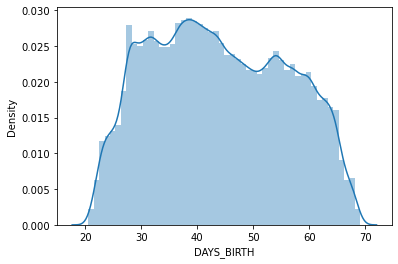

In [153]:
age = df["DAYS_BIRTH"]/-365
sns.distplot(age)

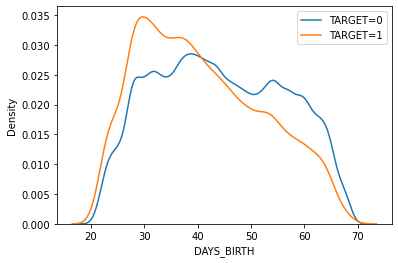

In [164]:
t0 = df.loc[df["TARGET"]==0]
t1 = df.loc[df["TARGET"]==1]

sns.kdeplot(t0["DAYS_BIRTH"]/-365,label="TARGET=0")
sns.kdeplot(t1["DAYS_BIRTH"]/-365,label="TARGET=1")
plt.legend()

デフォルトしている人は比較的若い人が多い分布傾向にある

In [176]:
df['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [183]:
it_un = df.loc[df['NAME_INCOME_TYPE']=="Unemployed"]
it_ml = df.loc[df['NAME_INCOME_TYPE']=='Maternity leave']

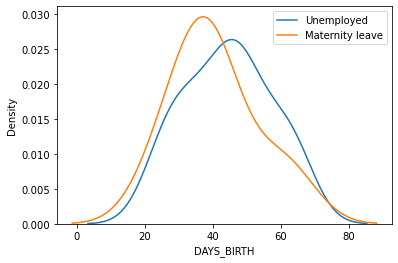

In [185]:
sns.kdeplot(it_un["DAYS_BIRTH"]/-365,label="Unemployed")
sns.kdeplot(it_ml["DAYS_BIRTH"]/-365,label='Maternity leave')
plt.legend()

In [ ]:
育児休暇でデフォルトしている人が多いためその結果が反映されたと考えられる。